In [1]:
class Agent:
    def __init__(self, x):
        self.x = x

def change_agent(agent):
    agent.x = 1


class Board:
    def __init__(self, agent):
        self.agent = agent

    def do_sth(self):
        change_agent(self.agent)
        


agent = Agent(None)
board = Board(agent)
board.do_sth()
print(agent.x)


1


In [3]:
# q_value that look like q_value[state][action] = value
q_value = {
    (1, 3, 1): {
        Action.UP: 0,
        Action.DOWN: 0,
    },
    (2, 3, 4): {
        Action.UP: 0,
        Action.DOWN: 0,
    }
}

for state in q_value:
    for action in q_value[state]:
        print(q_value[state][action])

0
0
0
0
0
0
0
0


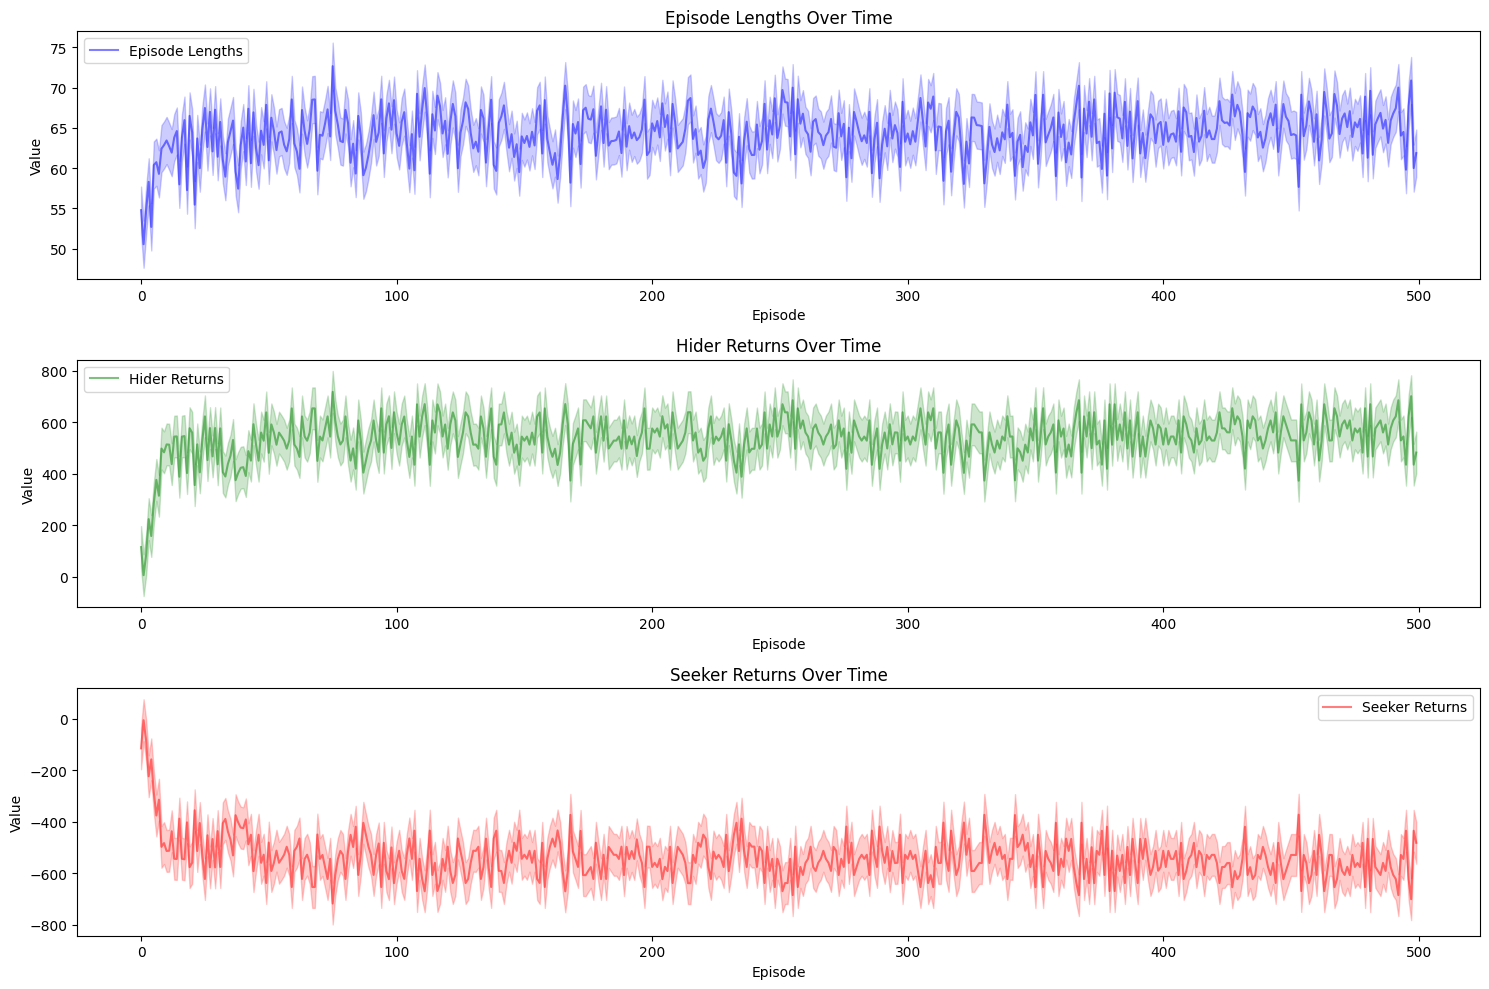

In [45]:
import matplotlib.pyplot as plt
import json
import numpy as np

with open("simulation_data.json", "r") as f:
    data = json.load(f)

def average_every_n_items(data, n):
    return [np.mean(data[i:i + n]) for i in range(0, len(data), n)]

def visualize_data(data) -> None:
    episode_lengths = data.get("episode_lengths", [])
    hider_returns = data.get("hider_returns", [])
    seeker_returns = data.get("seeker_returns", [])

    if not episode_lengths or not hider_returns or not seeker_returns:
        raise ValueError("Data is incomplete or missing.")

    episode_lengths_avg = average_every_n_items(episode_lengths, 100)
    hider_returns_avg = average_every_n_items(hider_returns, 100)
    seeker_returns_avg = average_every_n_items(seeker_returns, 100)

    def plot_with_average(ax, data, title, color):
        episodes = range(len(data))
        avg = np.mean(data)
        std_dev = np.std(data)

        ax.plot(episodes, data, label=title, color=color, alpha=0.5)
        ax.fill_between(episodes, np.array(data) - std_dev, np.array(data) + std_dev, color=color, alpha=0.2)
        ax.set_xlabel('Episode')
        ax.set_ylabel('Value')
        ax.set_title(f'{title} Over Time')
        ax.legend()

    fig, axs = plt.subplots(3, 1, figsize=(15, 10))

    plot_with_average(axs[0], episode_lengths_avg, 'Episode Lengths', 'blue')
    plot_with_average(axs[1], hider_returns_avg, 'Hider Returns', 'green')
    plot_with_average(axs[2], seeker_returns_avg, 'Seeker Returns', 'red')

    plt.tight_layout()
    plt.show()

visualize_data(data)

In [46]:
float(0.9999 ** 60_000) * 100

0.24780086129838003